Plot the temperature observations gathered from the World Ocean Database.

In [1]:
using NCDatasets
using DIVAnd
using PyPlot
using Dates
const plt = PyPlot
using Pkg
usecartopy = true

true

## Install Cartopy

In [2]:
if usecartopy
    ENV["PYTHON"] = "/usr/bin/python3"
    Pkg.build("PyCall")
    using PyCall
    ccrs = PyCall.pyimport("cartopy.crs")
    ccrs.PlateCarree()
end

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/53b8b07b721b77144a0fbbbc2675222ebf40a02d/build.log`
Precompiling project...
  ✓ PyCall
  ✓ PyPlot
  2 dependencies successfully precompiled in 10 seconds. 84 already precompiled.
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


LoadError: ArgumentError: Package PyCall not found in current path.
- Run `import Pkg; Pkg.add("PyCall")` to install the PyCall package.

In [2]:
inputdir = "/data/SeaDataCloud/NorthSea/"
figdir = "../figures/NorthSea_temperature/"
isdir(figdir) ? @debug("ok") : mkpath(figdir)
varname = "ITS-90 water temperature"
col1 = "#D8960F"
col2 = "#008538"

"#008538"

In [3]:
@time obsval, obslon, obslat, obsdepth, obstime, obsid = 
DIVAnd.loadobs(Float64, joinpath(inputdir, "NorthSea_temperature_timeseries.nc"), varname);

@time obsval2, obslon2, obslat2, obsdepth2, obstime2, obsid2 = 
DIVAnd.loadobs(Float64, joinpath(inputdir, "NorthSea_temperature_trajectories.nc"), varname);

  4.190336 seconds (4.77 M allocations: 990.289 MiB, 8.13% gc time, 47.16% compilation time)
  0.100529 seconds (1.44 k allocations: 69.441 MiB)


In [4]:
goodepth = obsdepth .<= 5.0;
goodepth2 = obsdepth2 .<= 5.0;
depth = obsdepth[goodepth];
depth2 = obsdepth[goodepth];

lon = obslon[goodepth]
lat = obslat[goodepth]
T = obsval[goodepth]

lon2 = obslon2[goodepth2]
lat2 = obslat2[goodepth2]
T2 = obsval2[goodepth2]

lowT = (T .<= 10.)
highT = (T .> 10.);

lowT2 = (T2 .<= 10.)
highT2 = (T2 .> 10.);

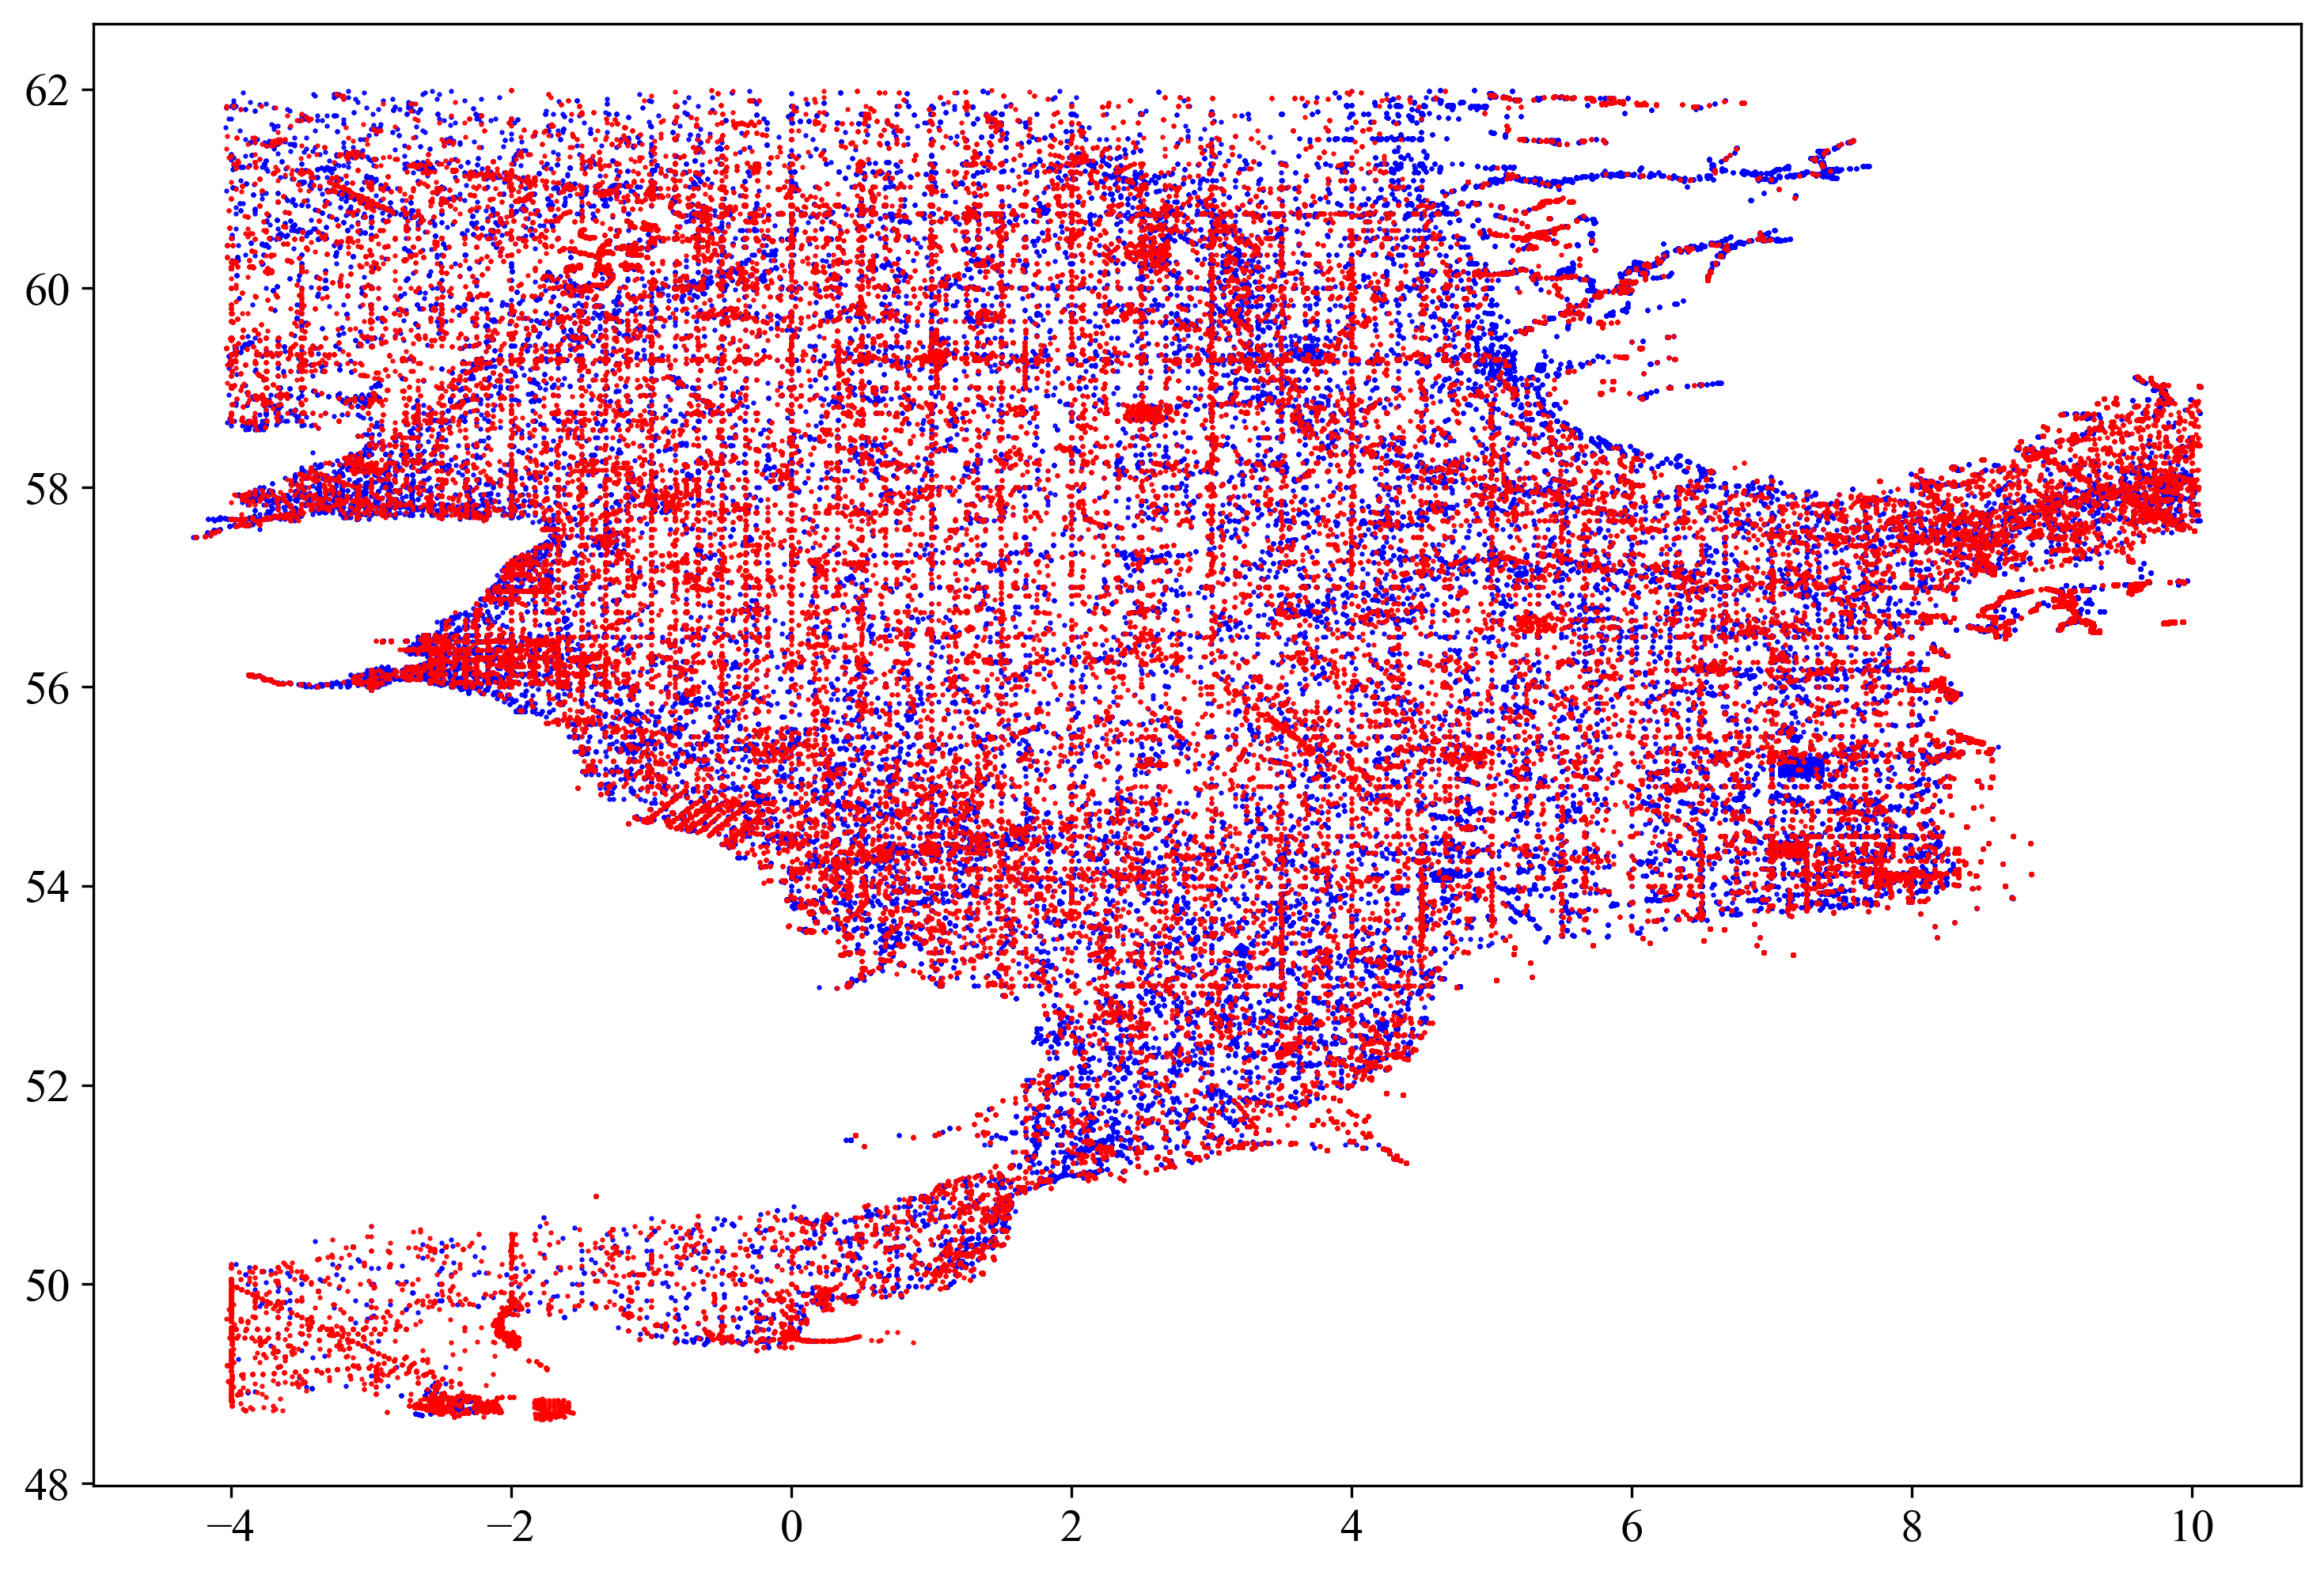

In [27]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(lon[lowT], lat[lowT], "bo", ms=.5)
ax.plot(lon[highT], lat[highT], "ro", ms=.5)
plt.show()

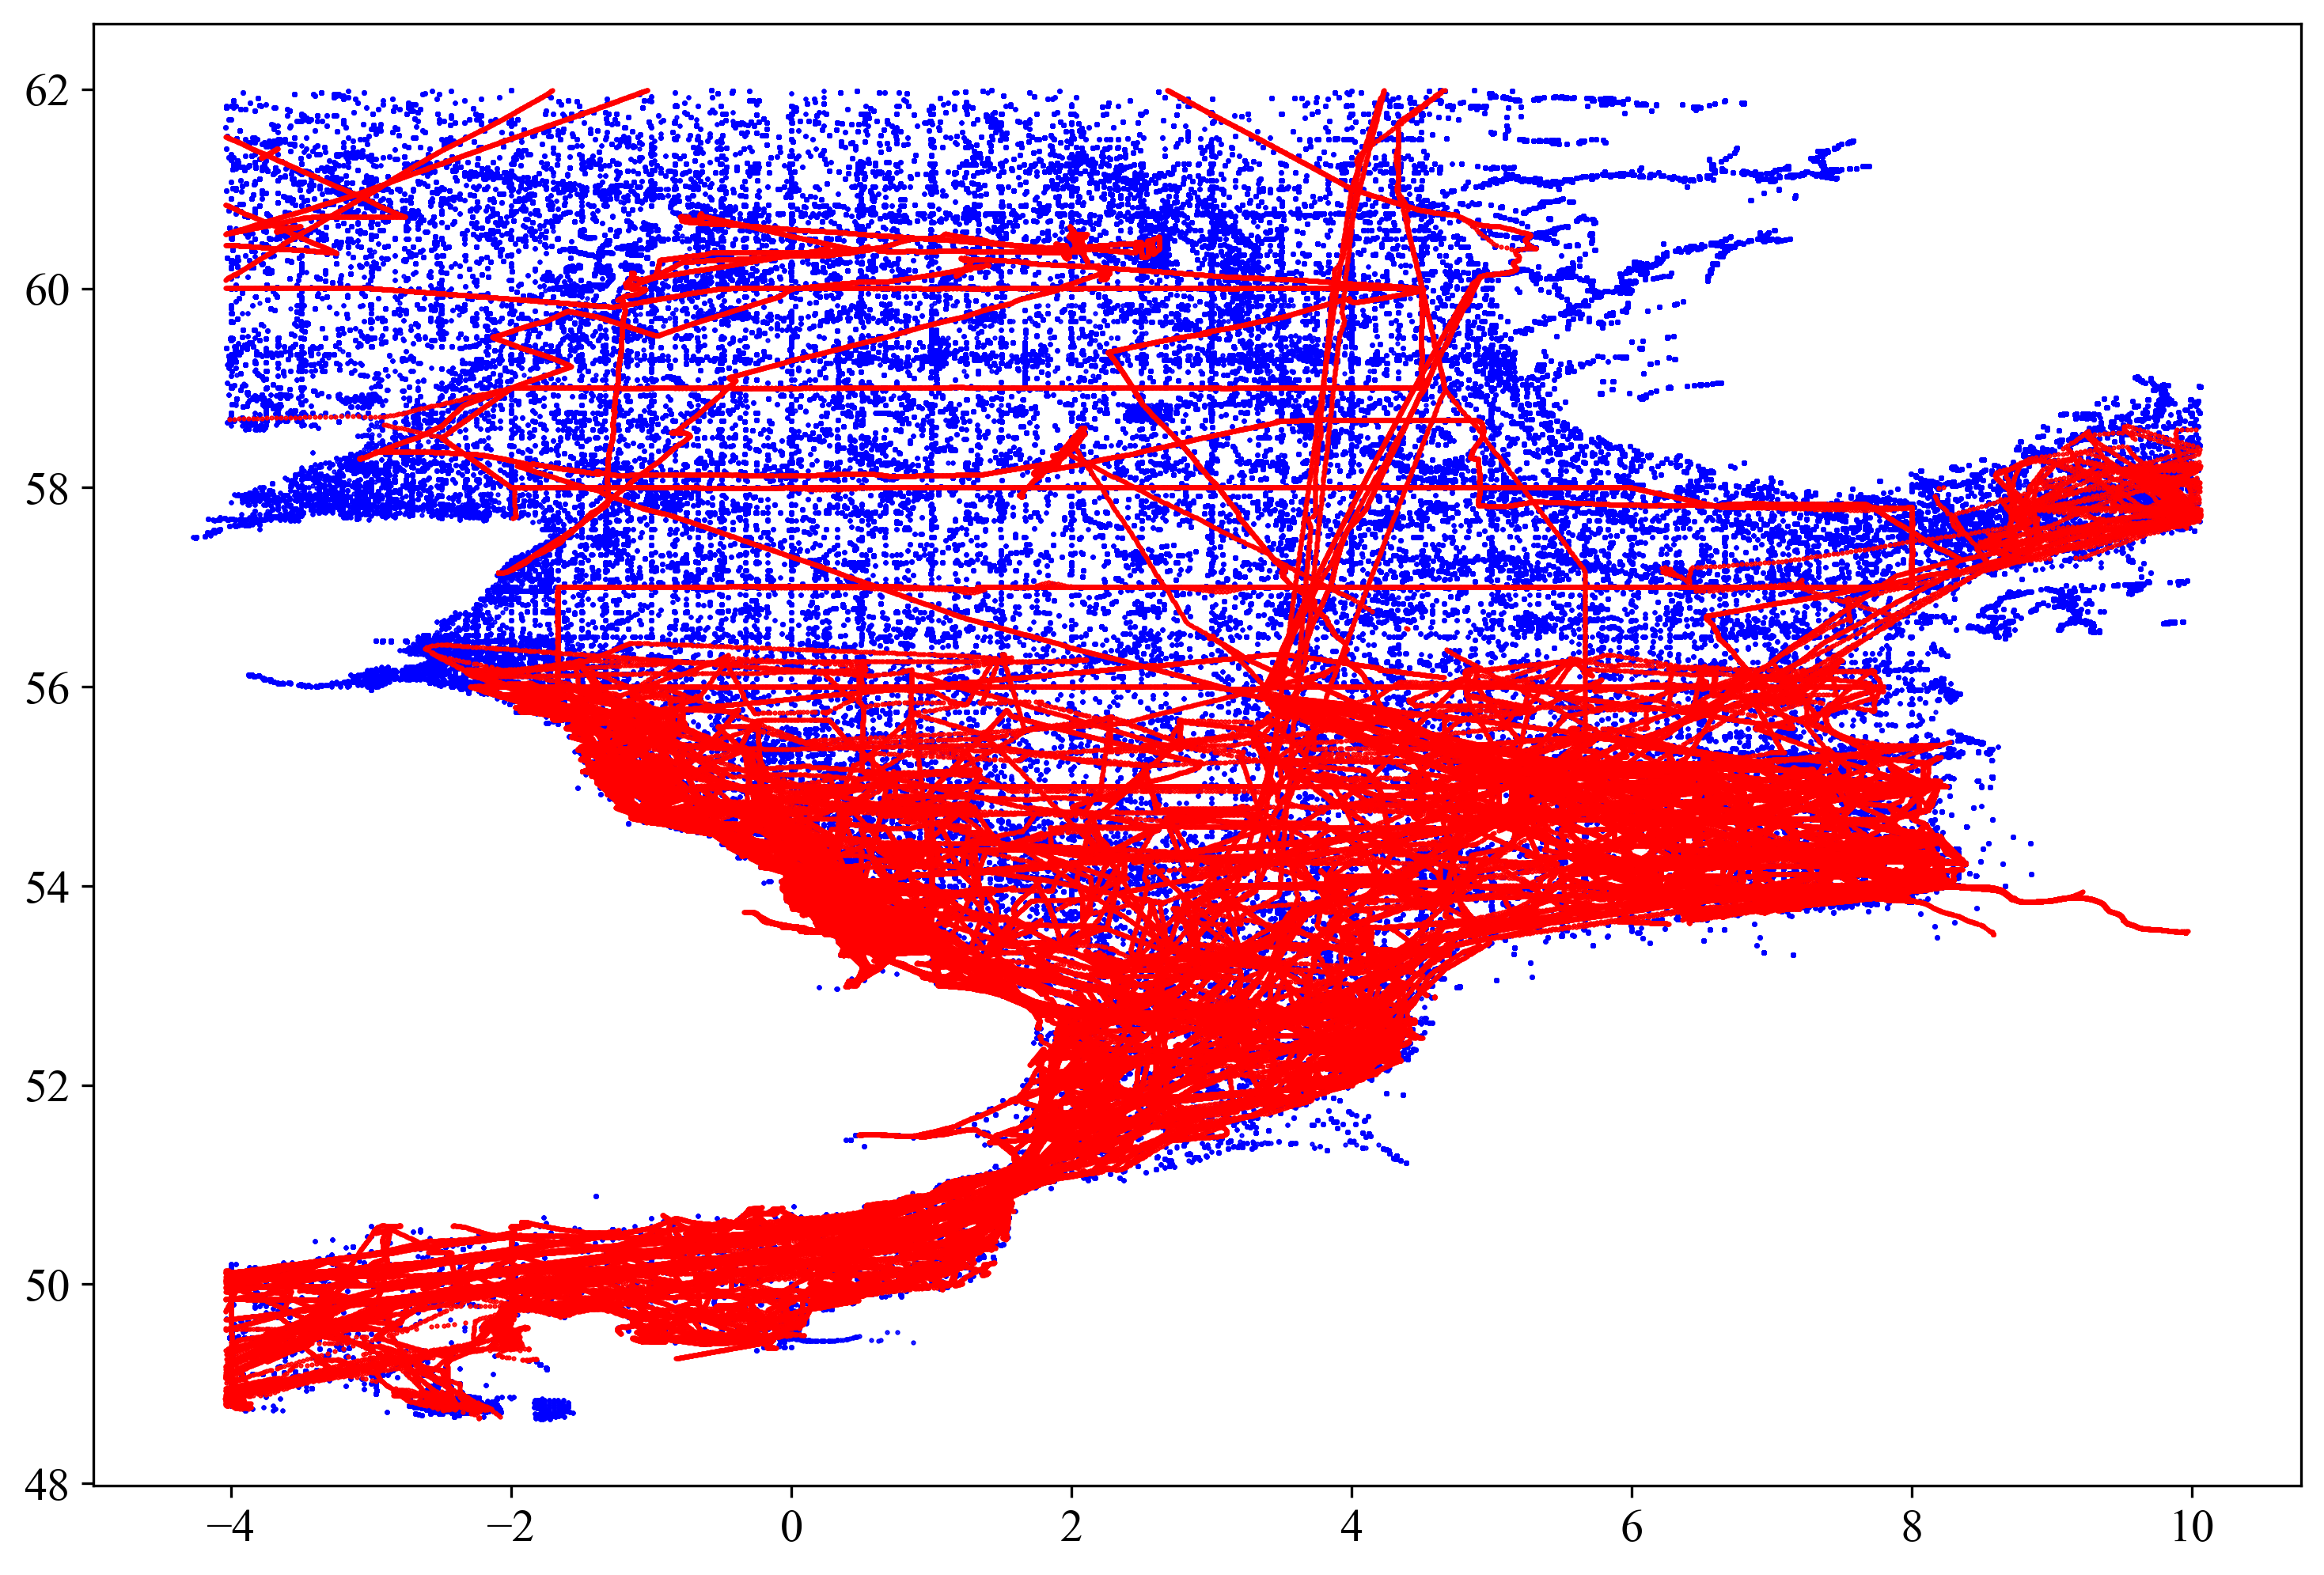

In [30]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(obslon, obslat, "bo", ms=.5)
ax.plot(obslon2, obslat2, "ro", ms=.5)
plt.show()

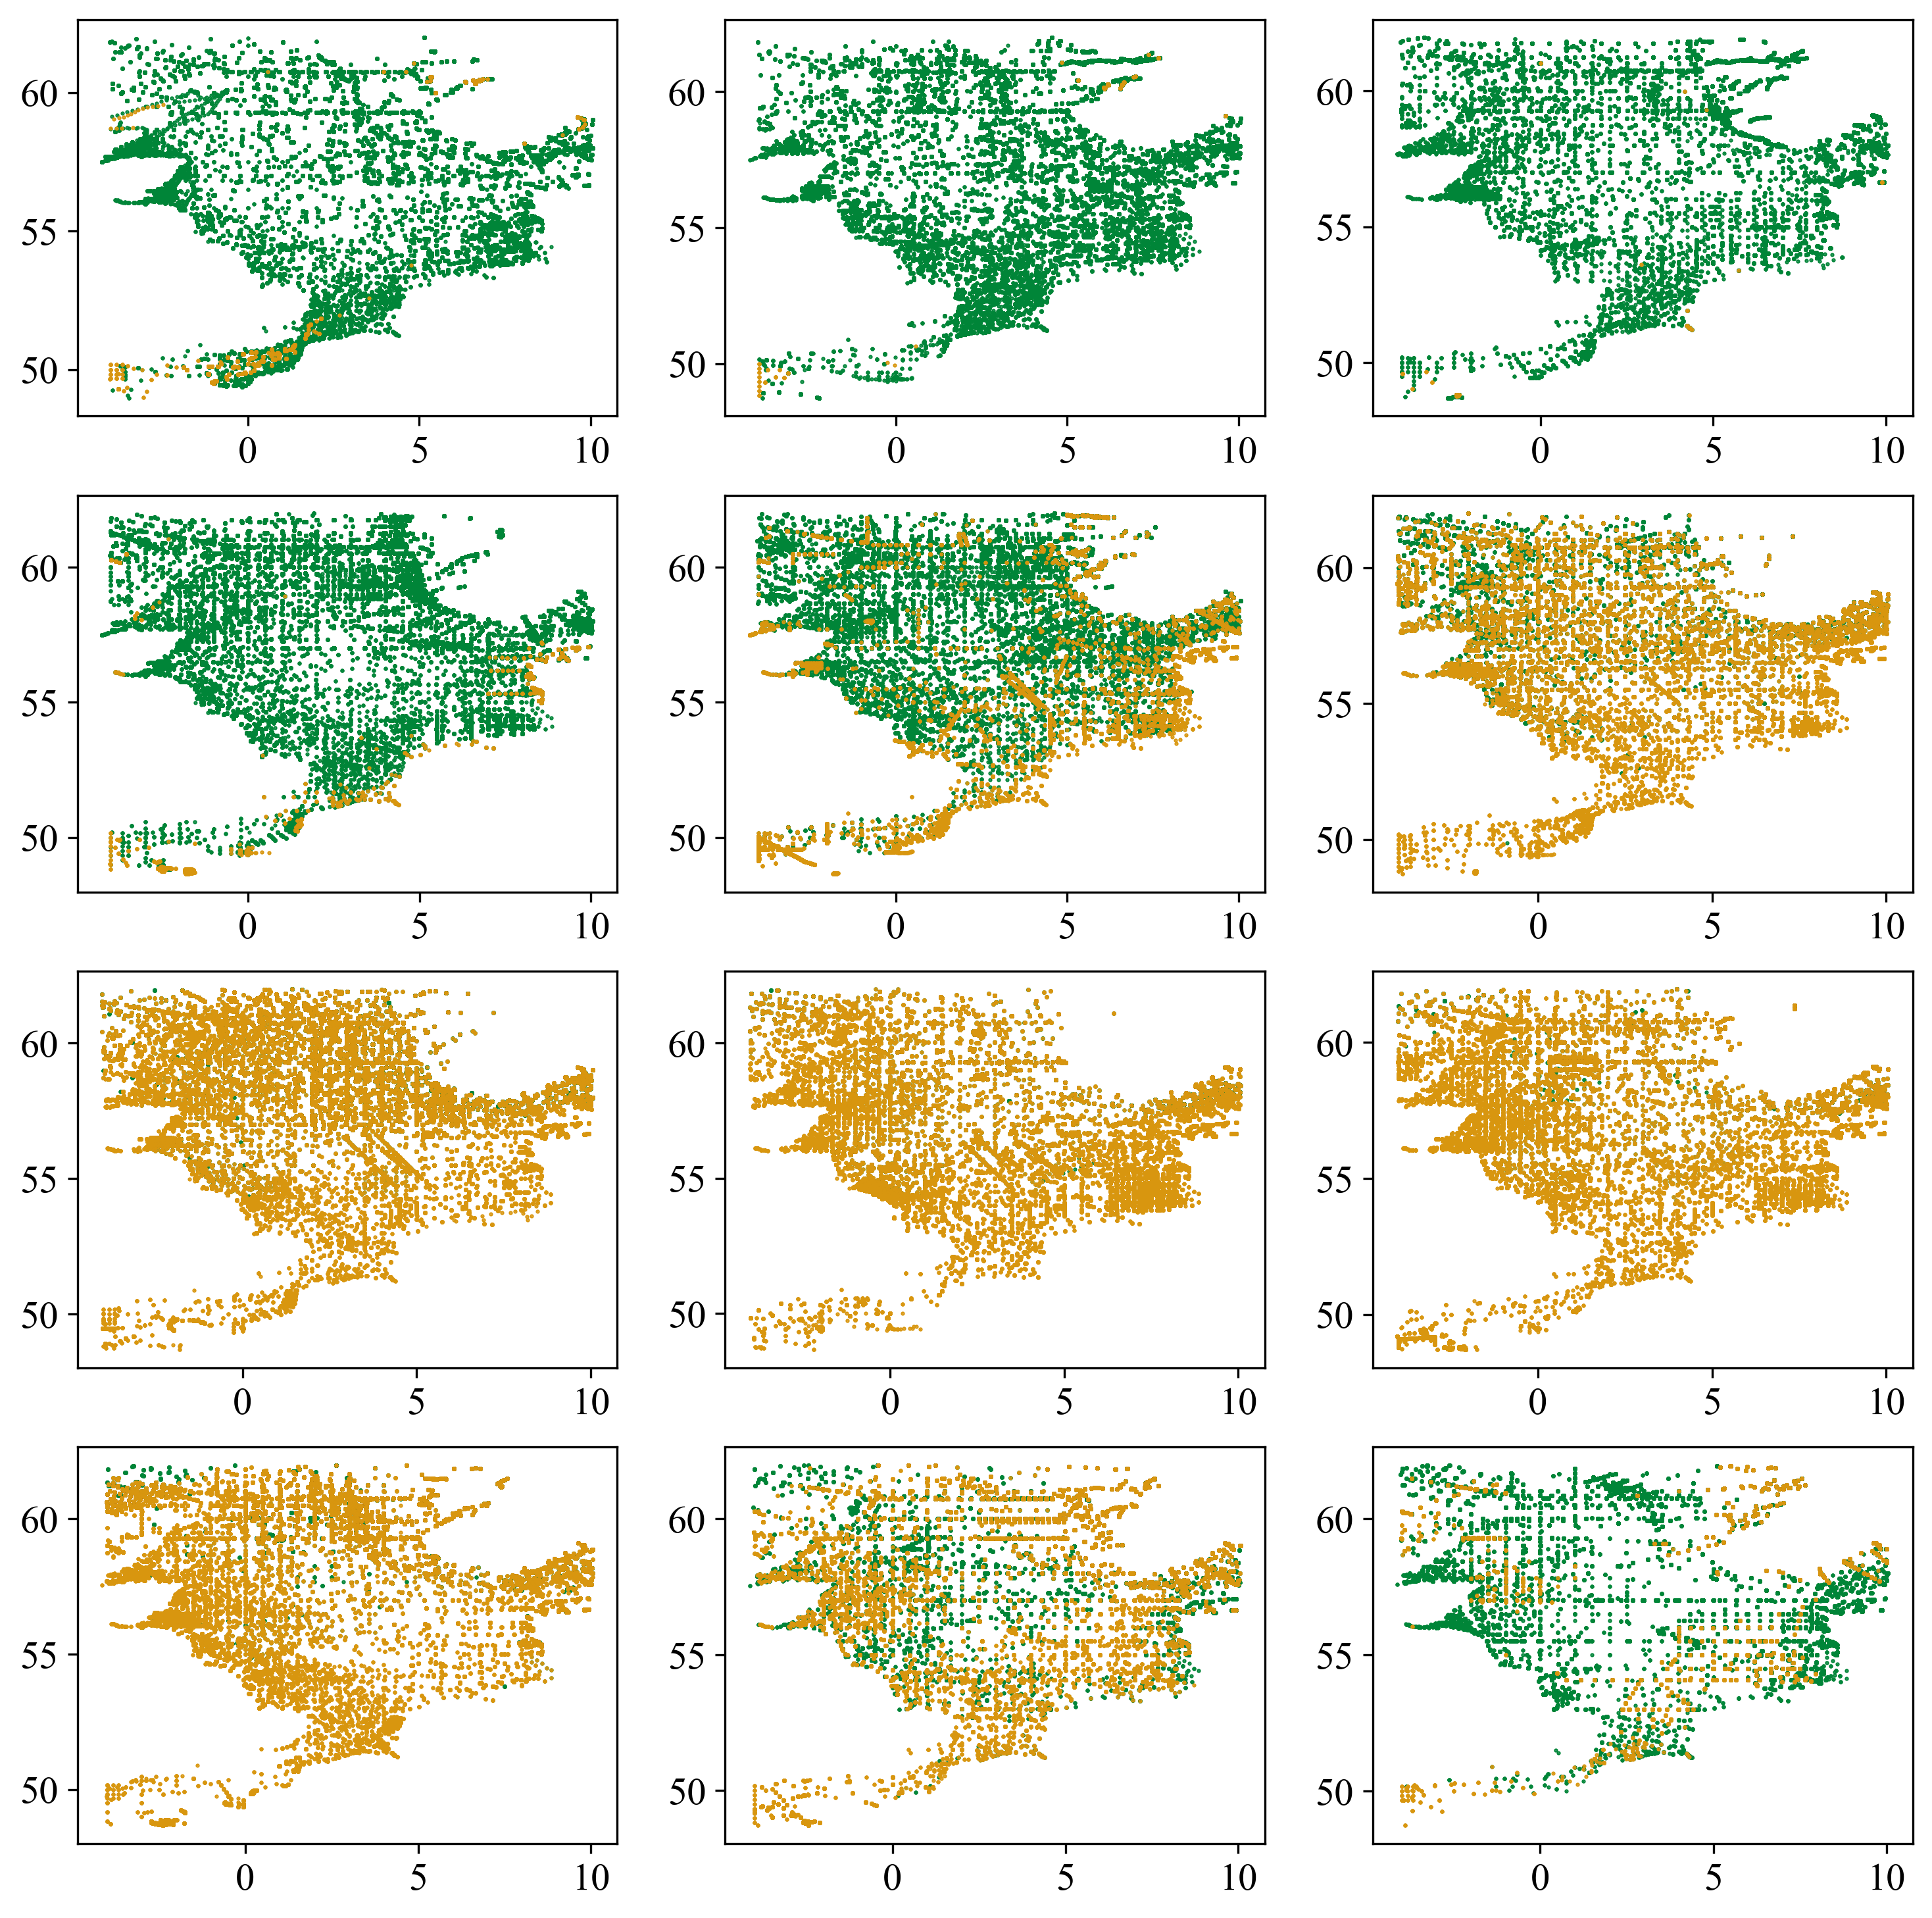

1
2
3
4
5
6
7
8
9
10
11
12


In [40]:
fig = plt.figure(figsize=(12, 12))
for m in 1:12
    
    println(m)
    goodmonth = (Dates.month.(obstime) .== m)
    
    T = obsval[goodmonth]
    lon = obslon[goodmonth]
    lat = obslat[goodmonth]
    
    lowT = (T .<= 10.)
    highT = (T .> 10.);
    
    ax = plt.subplot(4, 3, m)
    ax.plot(lon[lowT], lat[lowT], "o", ms=.5, color=col2)
    ax.plot(lon[highT], lat[highT], "o", ms=.5, color=col1)

end

plt.show()

In [7]:
years = Dates.year.(obstime)
months = Dates.month.(obstime)
@info(extrema(years));

┌ Info: (1893, 2017)
└ @ Main In[7]:3


In [9]:
function make_plot(lon, lat, T, figname::String, year, month)
    
    lowT = (T .<= 10.)
    highT = (T .> 10.);
    
    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111)
    ax.plot(lon[lowT], lat[lowT], "o", ms=.5, color=col2)
    ax.plot(lon[highT], lat[highT], "o", ms=.5, color=col1)
    ax.set_xlim(-4., 10.)
    ax.set_ylim(48., 62.)
    ax.set_title("$year $(month)")
    
    plt.savefig(figname, dpi=300, bbox_inches="tight")
    plt.close()
end

make_plot (generic function with 1 method)

In [10]:
for yy in 1960:1970
    @info("Working on year $(yy)")
    
    for m in 1:12
    
        goodtime = (months .== m) .& (years .== yy)
    
        T = obsval[goodtime]
        lon = obslon[goodtime]
        lat = obslat[goodtime]
        
        
        mm = lpad(m, 2, "0")
        figname = joinpath(figdir, "Temperature_$(yy)$(mm).jpg")
        make_plot(lon, lat, T, figname, yy, m)
        
    end
end

┌ Info: Working on year 1960
└ @ Main In[10]:2
┌ Info: Working on year 1961
└ @ Main In[10]:2
┌ Info: Working on year 1962
└ @ Main In[10]:2
┌ Info: Working on year 1963
└ @ Main In[10]:2
┌ Info: Working on year 1964
└ @ Main In[10]:2
┌ Info: Working on year 1965
└ @ Main In[10]:2
┌ Info: Working on year 1966
└ @ Main In[10]:2
┌ Info: Working on year 1967
└ @ Main In[10]:2
┌ Info: Working on year 1968
└ @ Main In[10]:2
┌ Info: Working on year 1969
└ @ Main In[10]:2
┌ Info: Working on year 1970
└ @ Main In[10]:2
